# Project Analysis
### Sam Andrews, Dom Bouchard, John Logsdon

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

## Analysis Question 2
- Does the conference a school is a member of or the region it resides in determine the team's style of play and success?

In [66]:
df = pd.read_csv('integrated_dataset.csv')
df.head()

,School,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,Type,City,State
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,32.7,36.2,71.7,8.6,2ND,1.0,2016,Public,Chapel Hill,North Carolina
1,North Carolina,ACC,39,33,121.0,91.5,0.9615,51.7,48.1,16.2,...,35.5,33.9,72.8,8.4,Champions,1.0,2017,Public,Chapel Hill,North Carolina
2,North Carolina,ACC,37,26,120.7,97.1,0.9242,52.0,50.1,16.7,...,35.9,38.0,72.6,7.1,R32,2.0,2018,Public,Chapel Hill,North Carolina
3,North Carolina,ACC,34,24,113.4,94.7,0.8883,49.9,47.0,16.9,...,33.6,31.7,70.8,4.2,R32,6.0,2014,Public,Chapel Hill,North Carolina
4,North Carolina,ACC,35,24,111.6,93.0,0.8902,49.3,48.0,17.2,...,37.2,34.4,71.4,2.5,R32,8.0,2013,Public,Chapel Hill,North Carolina


### Hypothesis Test
- ttest_ind comparing the offensive efficiency in public vs private universities

In [68]:
priv_offeff = df[df['Type'] == 'Private']['ADJOE']
pub_offeff = df[df['Type'] == 'Public']['ADJOE']
t_stat, p_val = ttest_ind(priv_offeff, pub_offeff, equal_var = False)
print(f"Hypothesis test comparing Private vs Public universities Offensive Efficiency:\n"
      f"  t-statistic = {t_stat:.4f}, p-value = {p_val:.4f}")

Hypothesis test comparing Private vs Public universities Offensive Efficiency:
  t-statistic = 2.5718, p-value = 0.0102


In [69]:
# interpretation
alpha = 0.05  # Significance level
if p_val < alpha:
    print("Reject H0: The average offensive efficiency is signficantly dxtifferent from Public to Private schools.")
else:
    print("Fail to reject H0: No significant difference in offensive efficiency between Public and Private schools.")

Reject H0: The average offensive efficiency is signficantly dxtifferent from Public to Private schools.


### Trend Visualization
- line plot of avg offensive efficiency grouping by conference

In [71]:
major_confs = ['ACC', 'B10', 'B12', 'P12', 'SEC', 'BE']
df_major_conf = df[df['CONF'].isin(major_confs)]

CONF
ACC    111.189506
B10    111.396000
B12    112.060526
BE     110.931092
P12    108.987121
SEC    109.800649
Name: ADJOE, dtype: float64

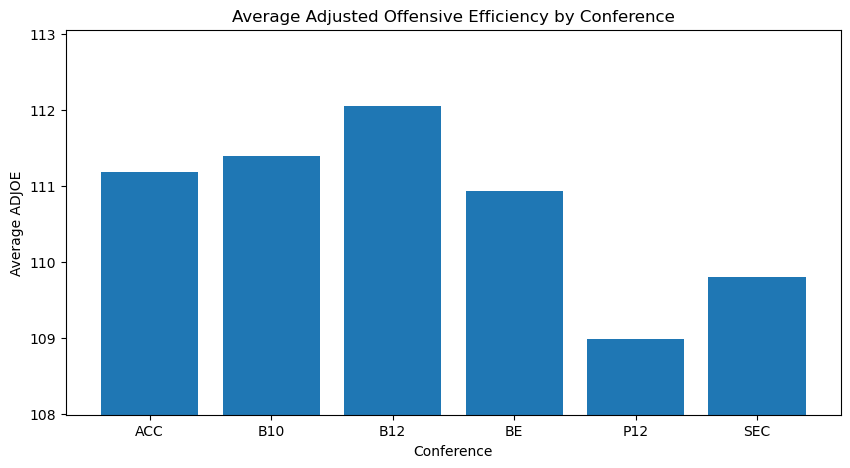

In [72]:
avg_offeff = df_major_conf.groupby('CONF')['ADJOE'].mean()
avg_defeff = df_major_conf.groupby('CONF')['ADJDE'].mean()
display(avg_offeff)

# zoom y‑axis in to start at min - 1 and end at max + 1
lower = avg_offeff.min() - 1
upper = avg_offeff.max() + 1

# plot
plt.figure(figsize=(10,5))
plt.bar(avg_offeff.index, avg_offeff.values)
plt.ylim(lower, upper)
plt.title('Average Adjusted Offensive Efficiency by Conference')
plt.xlabel('Conference')
plt.ylabel('Average ADJOE')
plt.show()

In [73]:
major_confs = ['ACC', 'B10', 'B12', 'P12', 'SEC', 'BE']
conf_dif_major = df[df['CONF'].isin(major_confs)]
conf_stats = conf_dif_major.groupby('CONF')[['3P_D', 'EFG_O', '3P_O', 'FTR', 'TOR', 'ORB']].mean()

# Corrected rename syntax:
conf_stats = conf_stats.rename(columns={
    '3P_D': '3P% Allowed',
    'EFG_O': 'Shooting Efficiency',
    '3P_O': '3P% Made',
    'FTR': 'Free Throw Rate/ possession',
    'TOR': 'Turn Over Rate/ possesion',
    'ORB': 'Offensive rebounds/ possesion'
    
})

# Display the results
conf_stats

,3P% Allowed,Shooting Efficiency,3P% Made,Free Throw Rate/ possession,Turn Over Rate/ possesion,Offensive rebounds/ possesion
CONF,,,,,,
ACC,33.664198,51.098765,34.856790,33.558025,17.232099,30.577160
B10,33.645333,50.832000,34.808000,33.512667,17.016667,30.153333
B12,33.335965,50.911404,34.655263,35.397368,18.299123,32.251754
BE,33.646218,51.038655,34.554622,34.179832,17.821008,30.471429
P12,34.096212,50.845455,34.938636,34.870455,17.915909,30.063636
SEC,33.049351,49.966234,33.624675,37.042208,18.438961,32.322727


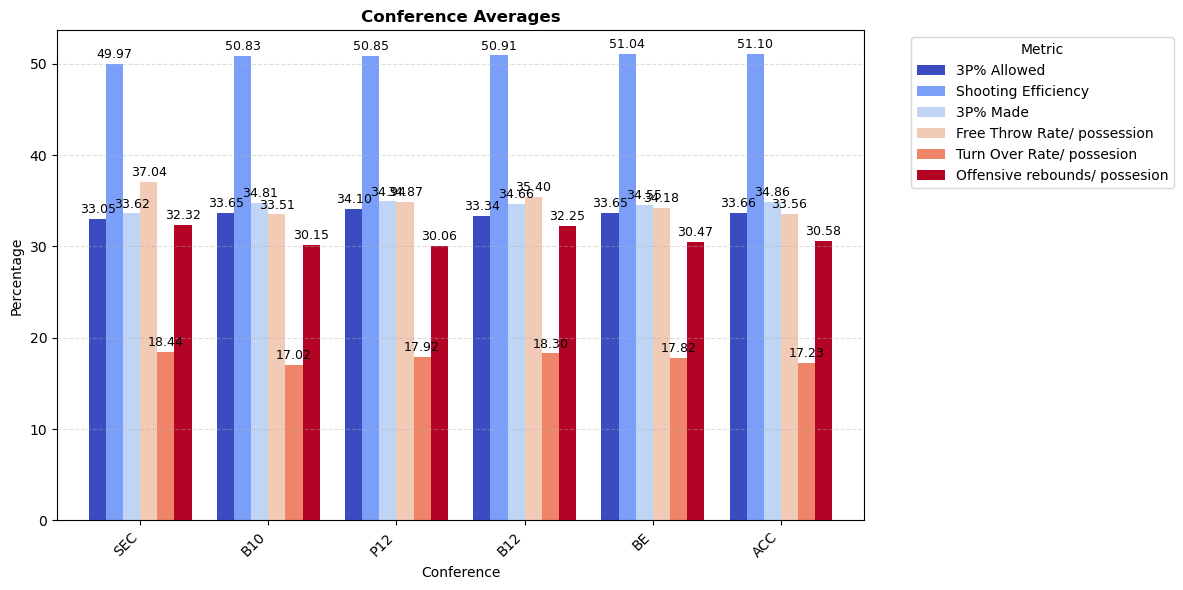

In [74]:
import matplotlib.pyplot as plt

# Rename columns for better readability
metric_rename = {
    '3P_D': '3P% Allowed',
    'EFG_O': 'Shooting Efficiency',
    '3P_O': '3P% Made',
    'FTR': 'Free Throw Rate/ possession',
    'TOR': 'Turn Over Rate/ possesion',
    'ORB': 'Offensive rebounds/ possesion'
}
grouped_renamed = conf_stats.rename(columns=metric_rename)

# Sort by 'Shooting Efficiency' for better visualization (optional)
grouped_sorted = grouped_renamed.sort_values('Shooting Efficiency')

# Plot with original values (no normalization)
ax = grouped_sorted.plot(kind='bar', 
                        figsize=(12, 6), 
                        width=0.8,
                        colormap='coolwarm')

plt.title('Conference Averages', fontweight='bold')
plt.ylabel('Percentage', fontsize=10)
plt.xlabel('Conference', fontsize=10)
plt.xticks(rotation=45, ha='right')

# Add data labels (now showing original values)
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=2, fontsize=9)

# Improve legend placement
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [75]:
major_confs = ['ACC', 'B10', 'B12', 'P12', 'SEC', 'BE']
conf_dif_major = df[df['CONF'].isin(major_confs)]
conf_stats = conf_dif_major.groupby('CONF')[['ADJ_T']].mean()

# Corrected rename syntax:
conf_stats = conf_stats.rename(columns={
    'ADJ_T': 'Pace',
})

# Display the results
conf_stats

,Pace
CONF,
ACC,67.154938
B10,66.978000
B12,67.696491
BE,67.783193
P12,67.961364
SEC,68.037013


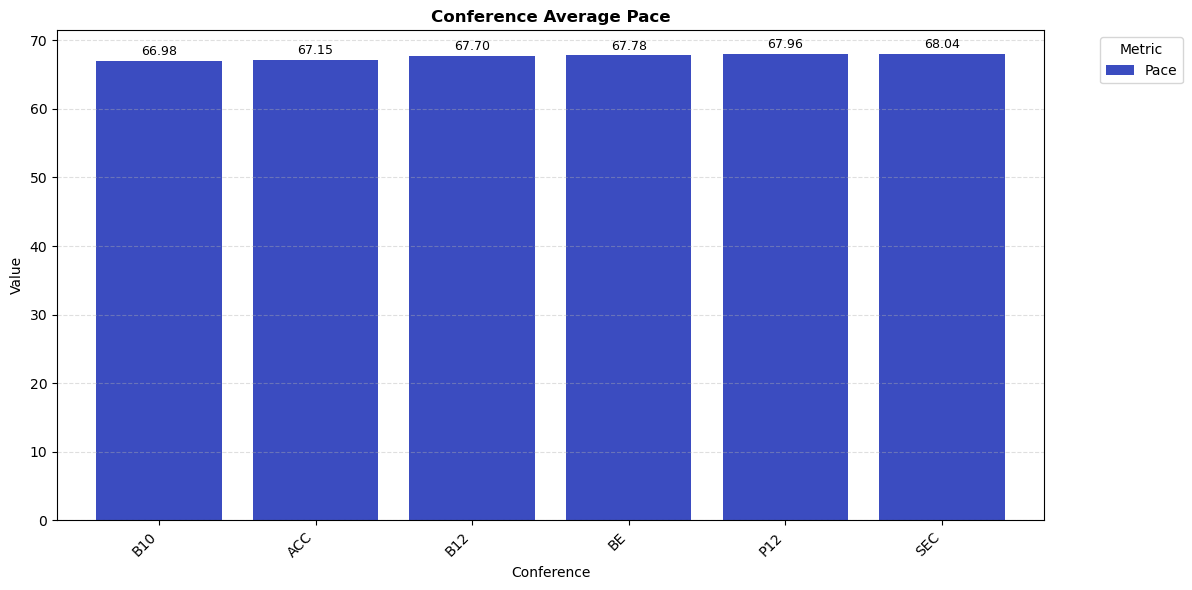

In [76]:
import matplotlib.pyplot as plt

# Rename columns for better readability
metric_rename = {
    'ADJ_T': 'Pace',
}
grouped_renamed = conf_stats.rename(columns=metric_rename)

# Sort by 'Shooting Efficiency' for better visualization (optional)
grouped_sorted = grouped_renamed.sort_values('Pace')

# Plot with original values (no normalization)
ax = grouped_sorted.plot(kind='bar', 
                        figsize=(12, 6), 
                        width=0.8,
                        colormap='coolwarm')

plt.title('Conference Average Pace', fontweight='bold')
plt.ylabel('Value', fontsize=10)
plt.xlabel('Conference', fontsize=10)
plt.xticks(rotation=45, ha='right')

# Add data labels (now showing original values)
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=2, fontsize=9)

# Improve legend placement
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [77]:
major_confs = ['ACC', 'B10', 'B12', 'P12', 'SEC', 'BE']
conf_dif_major = df[df['CONF'].isin(major_confs)]
conf_stats = conf_dif_major.groupby('CONF')[['ADJDE']].mean()

# Corrected rename syntax:
conf_stats = conf_stats.rename(columns={
    'ADJDE': 'Defensive Efficiency',
})

# Display the results
conf_stats

,Defensive Efficiency
CONF,
ACC,97.320988
B10,96.110000
B12,95.187719
BE,96.839496
P12,98.187121
SEC,96.833117


CONF
ACC    97.320988
B10    96.110000
B12    95.187719
BE     96.839496
P12    98.187121
SEC    96.833117
Name: ADJDE, dtype: float64

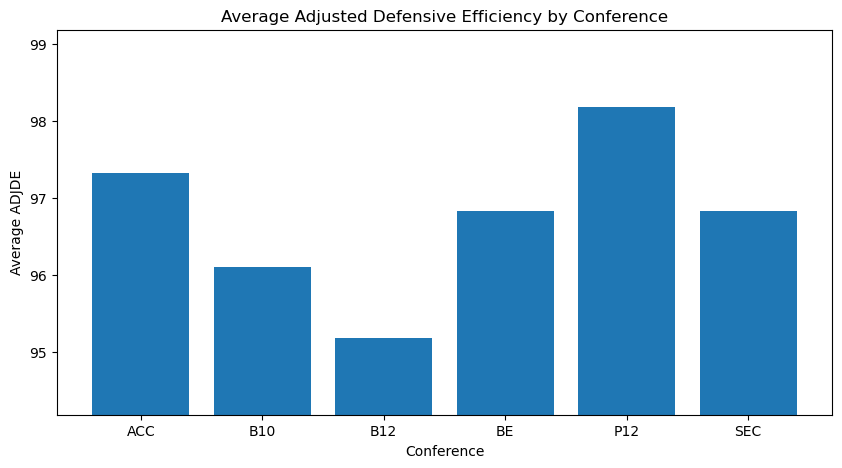

In [78]:
display(avg_defeff)

# zoom y‑axis in to start at min - 1 and end at max + 1
lower = avg_defeff.min() - 1
upper = avg_defeff.max() + 1

# plot
plt.figure(figsize=(10,5))
plt.bar(avg_defeff.index, avg_defeff.values)
plt.ylim(lower, upper)
plt.title('Average Adjusted Defensive Efficiency by Conference')
plt.xlabel('Conference')
plt.ylabel('Average ADJDE')
plt.show()